# Prova IA : Questão 1  


## Thales Monteiro Soares  

#### Multilabel classification emotion é uma base que contem informações de 593 músicas e suas emoções.
#### As emoções são:
    * amazed-suprised;
    * happy-pleased;
    * relaxing-calm;
    * quiet-still;
    * sad-lonely;
    * angry-aggresive;
#### Base utilizada: https://www.kaggle.com/srinivas365/multilabel-classification-emotions

# <center> Análise de emoções em músicas </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder


%matplotlib notebook

### Realizando leitura do dataframe emotions.arff

In [2]:
from scipy.io import arff

data = arff.loadarff('emotions.arff')
df = pd.DataFrame(data[0])


### As classes estão como binárias, foi necessário converter para inteiro.

In [3]:
df.iloc[:, 72:] = df.iloc[:, 72:].astype('int')

### Visualização das colunas do dataframe

##### É possivel observar que a base possui 72 colunas que são os atributos das músicas e as últimas 8 colunas são as emoções. 
##### Note que a base é multilabel, ou seja, cada música pode apresentar mais de uma classificação.

In [4]:
df.head()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,0,1,1,0,0,0
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,1,0,0,0,0,1
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3.0,0.188693,0.045941,0.457372,0,1,0,0,0,1
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2.0,0.102839,0.241934,0.351009,0,0,1,0,0,0
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2.0,0.195196,0.310801,0.683817,0,0,0,1,0,0


# Pré processamento dos dados

### Verificando se há instâncias com atributos duplicados
#### Foi verificado que não há instâncias duplicadas

In [5]:
print('Valores duplicados:', df.duplicated().value_counts())

Valores duplicados: False    593
dtype: int64


### Verificando quantidade de valores ausentes

#### Foi verificado 0 células com valores nulos

In [6]:
print('Valores Ausentes:', df.isnull().sum().value_counts())

Valores Ausentes: 0    78
dtype: int64


### Realizando Matriz de correlação 
#### Verificamos que algumas colunas apresentam alto indice de correlação

In [7]:
corr = df.corr()
corr.style.background_gradient("coolwarm")

#### Foi considerado alta correlação apenas os valores acima de 0.9
#### Foi verificado correlação de 0.918164 entre os atributos:
* Mean_Acc1298_Std_Mem40_Flux 
* Mean_Acc1298_Mean_Mem40_Flux


#### Essa alta correlação positiva indica indica que ambas fornecem quase o mesmo nivel de informação para a base. Iremos deletar a coluna Mean_Acc1298_Std_Mem40_Flux

In [8]:
df.drop('Mean_Acc1298_Std_Mem40_Flux', axis = 1, inplace = True)

### Tratando os outliers

#### Para observar a presença de outliers iremos realizar um boxplot da base inteira. Como o número de colunas é muito grande o boxplot ficará desproporcional, porém podemos observar alguns outlier que se destacam.

<IPython.core.display.Javascript object>


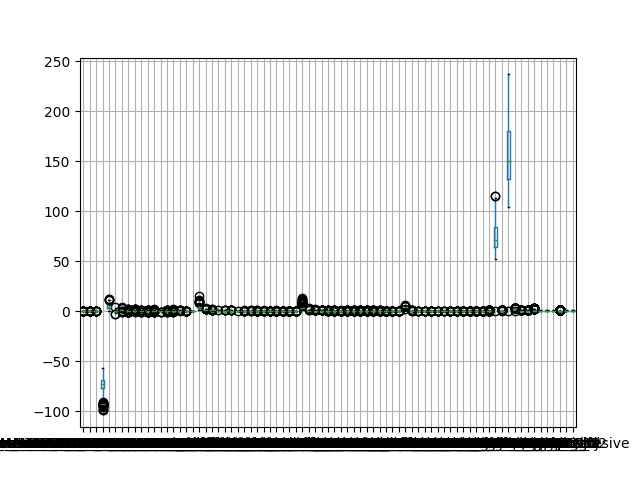

In [9]:
%matplotlib notebook

df.boxplot()

#### Podemos perceber que há outliers nas colunas:

* Mean_Acc1298_Mean_Mem40_MFCC_0 
* Mean_Acc1298_Std_Mem40_MFCC_0 
* Std_Acc1298_Mean_Mem40_MFCC_0

#### Plotando boxplot da coluna Mean_Acc1298_Mean_Mem40_MFCC_0

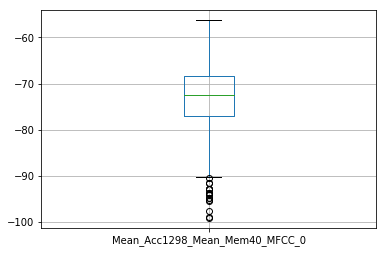

In [11]:
%matplotlib inline
pd.DataFrame(df['Mean_Acc1298_Mean_Mem40_MFCC_0']).boxplot()

In [12]:
# Verificando os valores do outlier
df['Mean_Acc1298_Mean_Mem40_MFCC_0'].nsmallest(4)

85    -99.090802
207   -98.890602
74    -97.510495
468   -95.358974
Name: Mean_Acc1298_Mean_Mem40_MFCC_0, dtype: float64

#### Excluindo os outliers

In [13]:
# Excluindo as linhas de indice 85, 207, 74, 468
df.drop([85, 207, 74], axis = 0, inplace = True)

#### Analisando outliers na coluna Mean_Acc1298_Std_Mem40_MFCC_0

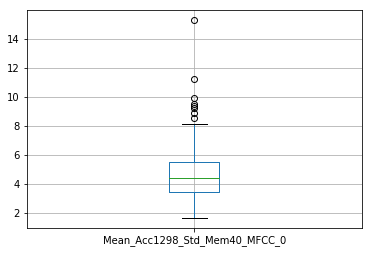

In [14]:
pd.DataFrame(df["Mean_Acc1298_Std_Mem40_MFCC_0"]).boxplot()

In [15]:
#Verificando os valores do outlier
df['Mean_Acc1298_Std_Mem40_MFCC_0'].nlargest(3)

27     15.262381
28     11.216391
525     9.939205
Name: Mean_Acc1298_Std_Mem40_MFCC_0, dtype: float64

#### Excluindo os outliers

In [16]:
# Excluindo as linhas de indice 27, 28, 525
df.drop([27,28,525], axis = 0, inplace = True)

#### Analisando outliers na coluna Std_Acc1298_Mean_Mem40_MFCC_0

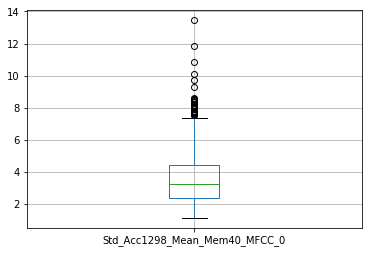

In [17]:
pd.DataFrame(df["Std_Acc1298_Mean_Mem40_MFCC_0"]).boxplot()

In [18]:
#Verificando os valores do outlier
df['Std_Acc1298_Std_Mem40_MFCC_0'].nlargest(3)

360    6.536928
316    5.790787
187    5.620447
Name: Std_Acc1298_Std_Mem40_MFCC_0, dtype: float64

#### Excluindo os outliers

In [19]:
# Excluindo as linhas de indice 27, 28, 525
df.drop([360, 316, 187], axis = 0, inplace = True)

### Resetando index do dataframe

In [20]:
df = df.reset_index()

In [21]:
# Excluindo a coluna index antiga
df.drop('index', axis = 1, inplace = True)

### Iremos realizar a normalização de todas as 71 colunas que compõem a entrada do classificador

In [22]:
# Foi utilizada a seguinte função para normalizar os dados
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [23]:
df.iloc[:, :71] = normalize(df.iloc[:, :71])

### Separando o dataframe em entrada(x) e saida(y)

In [24]:
x = df.iloc[:, :71]
y = df.iloc[:, 71:]

### Verificando balanceamento das classes

In [25]:
labels = ['amazed-suprised', 'happy-pleased' , 'relaxing-calm','quiet-still','sad-lonely','angry-aggresive' ]
quantValues = [y.loc[y['amazed-suprised'] == 1].count()[0], y.loc[y['happy-pleased'] == 1].count()[0] , y.loc[y['relaxing-calm'] == 1].count()[0], y.loc[y['quiet-still'] == 1].count()[0] , y.loc[y['sad-lonely'] == 1].count()[0], y.loc[y['angry-aggresive'] == 1].count()[0]]

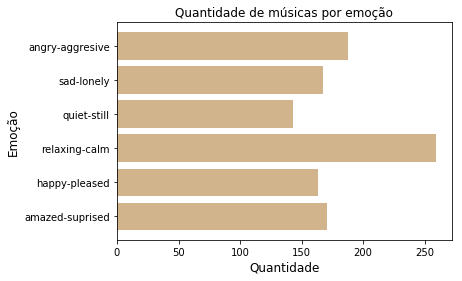

In [26]:
plt.barh(labels, quantValues, color= 'tan')
plt.xlabel('Quantidade', fontsize=12)
plt.ylabel('Emoção', fontsize=12)
plt.title('Quantidade de músicas por emoção')
plt.show()

#### No gŕafico de barras acima é possivel observar a quantidade de músicas que há na base para cada classe.

#### Foi realizado uma tentativa de balancear cada classe independentement, mas como a base é multilabel, um balanceamento afetava a outra classe.

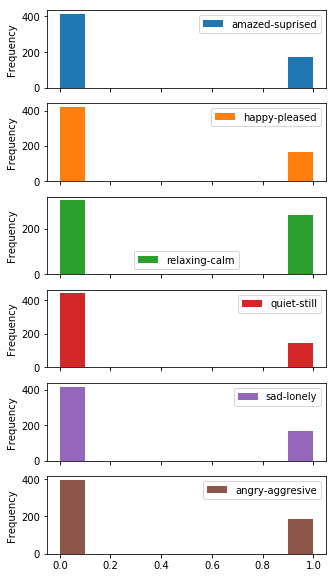

In [27]:
# Histograma das classes
%matplotlib inline
a = y.plot(kind='hist', subplots=True, figsize=(5,10))

# Split Data

#### Separando em dados de treino(entrada e saida) e dados de teste(entrada e saida)
#### Foi utilizado 20% para teste e 80% para treinamento

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=0)

# Métodos de classificação 

# KNN CLASSIFIER

#### Usando KNN para realizar a classificação do sentimento da música
#### Para tentar resolver o problema de multilabel iremos utilizar o OneVsRestClassifier. Essa abordagem trata cada rótulo de forma independente, enquanto os classificadores de vários rótulos podem tratar as várias classes simultaneamente, respondendo pelo comportamento correlato entre elas.

#### Foi utilizado K = 9 e Distancia de Manhattan como métrica.

In [29]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=9, metric = 'manhattan', algorithm = 'brute'))
knn.fit(x_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='brute',
                                                   leaf_size=30,
                                                   metric='manhattan',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=9,
                                                   p=2, weights='uniform'),
                    n_jobs=None)

In [30]:
# Aplica a mostra de teste no modelo
y_pred = knn.predict(x_test)

### Acurácia total do método

In [31]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred, normalize = True)
acc

0.3418803418803419

#### É notado uma baixa acuracia total do modelo, pois esta acuracia leva em conta o acerto de todas as labels de cada música

#### Verificando os acertos somente entre as classes, ou seja, se o modelo preveu certo cada emoção de musica de forma independente

In [32]:
(y_pred == y_test).mean()

amazed-suprised    0.811966
happy-pleased      0.683761
relaxing-calm      0.769231
quiet-still        0.940171
sad-lonely         0.863248
angry-aggresive    0.777778
dtype: float64

## Análise dos resultados do KNN

### Realizando Matriz de confusão

In [33]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

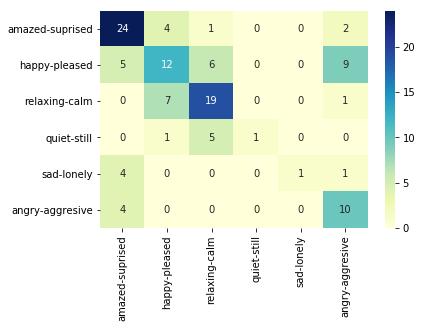

In [34]:
import seaborn as sns
%matplotlib inline
matrix = pd.DataFrame(matrix, index = labels, columns = labels)
sns.heatmap(matrix, annot = True, cmap="YlGnBu")

### A matriz de confusão tem como objetivo calcular a quantidade de falso positivo e falso negativo; e de verdadeiro positivo e verdadeiro negativo, também fornece a acurácia e a sensibilidade do modelo.

#### Os valores de verdadeiro positivo se encontram na diagonal principal da matriz


In [35]:
np.array(matrix)

array([[24,  4,  1,  0,  0,  2],
       [ 5, 12,  6,  0,  0,  9],
       [ 0,  7, 19,  0,  0,  1],
       [ 0,  1,  5,  1,  0,  0],
       [ 4,  0,  0,  0,  1,  1],
       [ 4,  0,  0,  0,  0, 10]])

### Sensibilidade
#### Sensibilidade é a proporção de casos positivos que foram identificados corretamente, ou seja, a quantidade de verdadeiro positivo / total 

In [36]:
sensibilidade = []
matriz = np.array(matrix)

for i in range(6):
    TP = 0
    total = 0
    for j in range(6):
        if(i == j):
            TP = matriz[i][j]
        total += matriz[i][j]
    sensibilidade.append(TP/total)

### A sensibilidade de cada classe é a seguinte:

In [37]:
pd.DataFrame([sensibilidade], columns = labels).round(3)

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.774,0.375,0.704,0.143,0.167,0.714


## Especificidade
#### É a proporção de casos negativos que foram identificados corretamente, ou seja, o número de verdadeiros negativos/ total

In [38]:
especificidade = []
totalD = 0

for i in range(6):
    TP = 0
    total = 0
    for j in range(6):
        if(i == j):
            totalD += matriz[i][j]
for i in range(6):
    col = 0
    diag = 0
    for j in range(0,6):
        if(i == j):
            diag = matriz[i][j]
        col += matriz[i][j]
    tn = totalD - diag
    especificidade.append(tn/(tn+(col - diag)))

In [39]:
pd.DataFrame([especificidade], columns = labels).round(3)

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.86,0.733,0.857,0.917,0.93,0.934


### Medida F1

In [40]:
from sklearn.metrics import f1_score

pd.DataFrame([f1_score(y_test, y_pred, average = 'micro')], columns = ['F1 Score']).round(3)

,F1 Score
0,0.662


### Acurácia

#### Como a base é multilabel o calculo pela função do sklearn não leva em conta todas as labels.
#### Ex. Se uma música é possui as emoções amazed-suprised e happy-pleased e o modelo classificasse como apenas amazed-suprised a função contaria isso como um erro.
#### No caso da acurácia apartir da matriz de confusão é a proporção de casos que foram corretamente previstos, sejam eles verdadeiro positivo ou verdadeiro negativo de cada classe

In [41]:
tp = 0
tudo = 0

for i in range(6):
    for j in range(6):
        if(i == j):
            tp += matriz[i][j]
        tudo += matriz[i][j]

pd.DataFrame([tp/tudo], columns = ["Acurácia"]).round(3)

,Acurácia
0,0.573


### Cross Validation com cv = 10

In [42]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn, x_test, y_test, cv=10).mean()

0.22803030303030303

# SVC CLASSIFIER
#### Foi utilizado o SVC Classifier devido a sua facilidade de implementação e inicialmente utilizamos  kernel rbf

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=0)

In [44]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

clf = OneVsRestClassifier(SVC(kernel = 'rbf')).fit(x_train, y_train)
clf

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

#### Foi necessário utilizar o csc_matrix para deixar as bases no formato de uma matriz linha esparsa para o cálculo da acurácia. 

In [45]:
from scipy.sparse import csc_matrix

y_predict = clf.predict(x_test)
parsePred = csc_matrix(y_predict)
parseYtest = csc_matrix(y_test)

#### Acurácia do modelo

In [46]:
acc = accuracy_score(parseYtest, parsePred, normalize = True)
acc

0.3504273504273504

#### Acurácia individual de cada classe

In [47]:
(y_predict == y_test).mean()

amazed-suprised    0.811966
happy-pleased      0.692308
relaxing-calm      0.811966
quiet-still        0.940171
sad-lonely         0.846154
angry-aggresive    0.846154
dtype: float64

## Análise dos resultados do SVC

### Matriz de confusão

In [48]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test.values.argmax(axis=1), y_predict.argmax(axis=1))

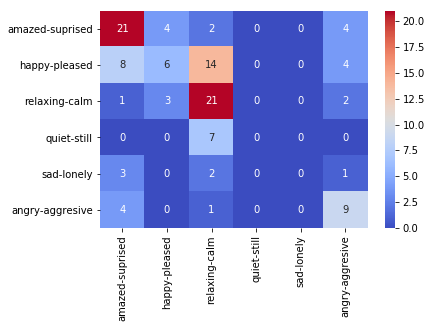

In [49]:
import seaborn as sns
%matplotlib inline
matrix = pd.DataFrame(matrix, index = labels, columns = labels)
sns.heatmap(matrix, annot = True, cmap="coolwarm")

In [50]:
matriz = np.array(matrix)
matriz

array([[21,  4,  2,  0,  0,  4],
       [ 8,  6, 14,  0,  0,  4],
       [ 1,  3, 21,  0,  0,  2],
       [ 0,  0,  7,  0,  0,  0],
       [ 3,  0,  2,  0,  0,  1],
       [ 4,  0,  1,  0,  0,  9]])

### Sensibilidade do modelo

In [51]:
sensibilidade = []
matriz = np.array(matrix)

for i in range(6):
    TP = 0
    total = 0
    for j in range(6):
        if(i == j):
            TP = matriz[i][j]
        total += matriz[i][j]
    sensibilidade.append(TP/total)

In [52]:
pd.DataFrame([sensibilidade], columns = labels).round(3)

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.677,0.188,0.778,0.0,0.0,0.643


### Especificidade do modelo

In [53]:
especificidade = []
totalD = 0

for i in range(6):
    TP = 0
    total = 0
    for j in range(6):
        if(i == j):
            totalD += matriz[i][j]
for i in range(6):
    col = 0
    diag = 0
    for j in range(0,6):
        if(i == j):
            diag = matriz[i][j]
        col += matriz[i][j]
    tn = totalD - diag
    especificidade.append(tn/(tn+(col - diag)))

In [54]:
pd.DataFrame([especificidade], columns = labels).round(3)

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.783,0.662,0.857,0.891,0.905,0.906


### F1 Score

In [55]:
from sklearn.metrics import f1_score

pd.DataFrame([f1_score(y_test, y_pred, average = 'micro')], columns = ['F1 Score']).round(3)

,F1 Score
0,0.662


### Acurácia total do modelo levando em conta o acerto de cada classe

In [56]:
tp = 0
tudo = 0

for i in range(6):
    for j in range(6):
        if(i == j):
            tp += matriz[i][j]
        tudo += matriz[i][j]

pd.DataFrame([tp/tudo], columns = ["Acurácia"]).round(3)

,Acurácia
0,0.487


# Modificando parâmetros

# <center> KNN
## K = 9

<center> Sensibilidade


amazed-suprised | happy-pleased | relaxing-calm | quiet-still| sad-lonely | angry-aggresive
:--------- | :------: | -------:| -------:| -------:| -------:
0.774|0.375	|0.704	|0.143	|0.167	|0.714
    
    
<center> Especificidade


amazed-suprised | happy-pleased | relaxing-calm | quiet-still| sad-lonely | angry-aggresive
:--------- | :------: | -------:| -------:| -------:| -------:
0.86	|0.733	|0.857	|0.917	|0.93	|0.934


<center> F1 Score : 0.662
    
<center> Acurácia: 0.573

## K = 13

<center> Sensibilidade


amazed-suprised | happy-pleased | relaxing-calm | quiet-still| sad-lonely | angry-aggresive
:--------- | :------: | -------:| -------:| -------:| -------:
0.806	|0.219|	0.667|	0.143|	0.0	|0.714
    
    
<center> Especificidade


amazed-suprised | happy-pleased | relaxing-calm | quiet-still| sad-lonely | angry-aggresive
:--------- | :------: | -------:| -------:| -------:| -------:
0.857	|0.684	|0.827|	0.909	|0.91	|0.927|


<center> F1 Score : 0.645
    
<center> Acurácia: 0.521


## K = 19

<center> Sensibilidade


amazed-suprised | happy-pleased | relaxing-calm | quiet-still| sad-lonely | angry-aggresive
:--------- | :------: | -------:| -------:| -------:| -------:
0.774|	0.219|	0.778|	0.143|	0.0|	0.714
    
    
<center> Especificidade


amazed-suprised | happy-pleased | relaxing-calm | quiet-still| sad-lonely | angry-aggresive
:--------- | :------: | -------:| -------:| -------:| -------:
0.848|	0.691	|0.875	|0.912|	0.913	|0.93


<center> F1 Score : 0.68
    
<center> Acurácia: 0.538


## K = 27

<center> Sensibilidade


amazed-suprised | happy-pleased | relaxing-calm | quiet-still| sad-lonely | angry-aggresive
:--------- | :------: | -------:| -------:| -------:| -------:
0.742|	0.281	|0.778	|0.0	|0.0	|0.714
    
    
<center> Especificidade


amazed-suprised | happy-pleased | relaxing-calm | quiet-still| sad-lonely | angry-aggresive
:--------- | :------: | -------:| -------:| -------:| -------:
0.833	|0.701|	0.875|	0.9|	0.913|	0.93


<center> F1 Score : 0.682
    
<center> Acurácia: 0.538

# <center> Métrica de distância
    

## K = 9       <center> Função : Euclidean

<center> Sensibilidade


amazed-suprised | happy-pleased | relaxing-calm | quiet-still| sad-lonely | angry-aggresive
:--------- | :------: | -------:| -------:| -------:| -------:
0.645|	0.344|	0.667|	0.143|	0.0	|0.643
    
    
<center> Especificidade


amazed-suprised | happy-pleased | relaxing-calm | quiet-still| sad-lonely | angry-aggresive
:--------- | :------: | -------:| -------:| -------:| -------:
0.78|	0.696|	0.82|	0.906|	0.908|	0.909


<center> F1 Score : 0.634
    
<center> Acurácia: 0.504

## K = 9       <center> Função : Chebyshev

<center> Sensibilidade


amazed-suprised | happy-pleased | relaxing-calm | quiet-still| sad-lonely | angry-aggresive
:--------- | :------: | -------:| -------:| -------:| -------:
0.774	|0.219|	0.444	|0.429	|0.5|	0.5
    
    
<center> Especificidade


amazed-suprised | happy-pleased | relaxing-calm | quiet-still| sad-lonely | angry-aggresive
:--------- | :------: | -------:| -------:| -------:| -------:
0.821	 |0.662	 |0.746 |	0.93 |	0.946	 |0.875


<center> F1 Score : 0.635
    
<center> Acurácia: 0.479

## K = 9       <center> Função : Minkowski

<center> Sensibilidade


amazed-suprised | happy-pleased | relaxing-calm | quiet-still| sad-lonely | angry-aggresive
:--------- | :------: | -------:| -------:| -------:| -------:
0.645	|0.344|	0.667|	0.143|	0.0	|0.643
    
    
<center> Especificidade


amazed-suprised | happy-pleased | relaxing-calm | quiet-still| sad-lonely | angry-aggresive
:--------- | :------: | -------:| -------:| -------:| -------:
0.78	|0.696	|0.82	|0.906	|0.908	|0.909


<center> F1 Score : 0.634
    
<center> Acurácia: 0.504

### Entre todos os testes realizados a melhor combinação de K e função de ativação foi: K = 9 e Manhattan.

# <center> SVC

# Função kernel = rbf

<center> Sensibilidade

amazed-suprised | happy-pleased | relaxing-calm | quiet-still| sad-lonely | angry-aggresive
:--------- | :------: | -------:| -------:| -------:| -------:
0.677	|0.188|	0.778|	0.0|	0.0|	0.643
    
<center> Especificidade


amazed-suprised | happy-pleased | relaxing-calm | quiet-still| sad-lonely | angry-aggresive
:--------- | :------: | -------:| -------:| -------:| -------:
0.783|	0.662	|0.857|	0.891|	0.905|	0.906


<center> F1 Score : 0.634
    
<center> Acurácia: 0.487

# Função kernel = linear

<center> Sensibilidade


amazed-suprised | happy-pleased | relaxing-calm | quiet-still| sad-lonely | angry-aggresive
:--------- | :------: | -------:| -------:| -------:| -------:
0.71|	0.0|	0.852|	0.0	| 0.0	|0.5
     
<center> Especificidade


amazed-suprised | happy-pleased | relaxing-calm | quiet-still| sad-lonely | angry-aggresive
:--------- | :------: | -------:| -------:| -------:| -------:
0.769	 |0.619	 |0.879	 |0.881 |	0.897 |	0.865


<center> F1 Score : 0.634
    
<center> Acurácia: 0.444

# Função kernel = poly

<center> Sensibilidade


amazed-suprised | happy-pleased | relaxing-calm | quiet-still| sad-lonely | angry-aggresive
:--------- | :------: | -------:| -------:| -------:| -------:
0.71|	0.281	|0.519	|0.286	|0.0	|0.357
    
    
<center> Especificidade


amazed-suprised | happy-pleased | relaxing-calm | quiet-still| sad-lonely | angry-aggresive
:--------- | :------: | -------:| -------:| -------:| -------:
0.769	 |0.652 |	0.745 |	0.909 |	0.897	 |0.839


<center> F1 Score : 0.634
    
<center> Acurácia: 0.444

### A melhor função kernel foi a rbf.